Motivations for sensor fusion
------------------------------

Import data set: rate-gyro measurements (no motion)

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# import data set
dataCSV = np.genfromtxt('https://sites.google.com/site/bertrandsylvain/samplelecture/dataGyroY.csv', delimiter=';')
 
time = dataCSV[:,0]   # time in sec
gyroY = dataCSV[:,1]  # angular velocity in rad/s


Plot raw measurements

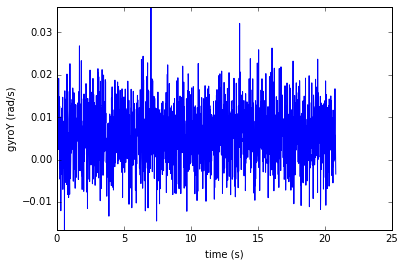

In [8]:
plt.figure()
plt.plot(time, gyroY)
plt.ylim([np.min(gyroY), np.max(gyroY)])
plt.xlabel('time (s)')
plt.ylabel('gyroY (rad/s)')
plt.show()

Compute bias and stabdard deviation of noise

In [9]:
bias = np.mean(gyroY)
stdDev = np.std(gyroY)
print "bias:",bias,"rad/s"
print "stdDev:",stdDev,"rad/s"

bias: 0.00593682909265 rad/s
stdDev: 0.00658394630188 rad/s


Compensate for bias

In [10]:
gyroYUnbiased = gyroY - bias

Filter noise

In [11]:
tau=0.7;
alpha = (time[1]-time[0])/tau;
gyroYFiltered = np.zeros_like(gyroY)
for k in range(1,len(gyroY)):
    gyroYFiltered[k] = -(alpha-1)* gyroYFiltered[k-1] + alpha*(gyroYUnbiased[k])

Plot unbiased filtered data (red)

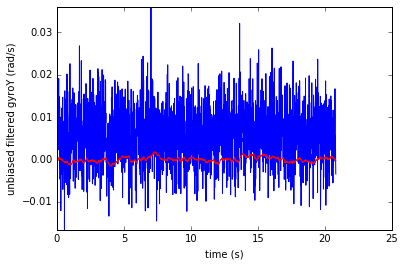

In [12]:
plt.figure()
plt.plot(time, gyroY, 'b', time, gyroYFiltered,'r')
plt.ylim([np.min(gyroY), np.max(gyroY)])
plt.xlabel('time (s)')
plt.ylabel('unbiased filtered gyroY (rad/s)')
plt.show()